In [ ]:
!pip install cmake dlib face_recognition numpy opencv-python

     |████████████████████████████████| 100.2MB 56kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=5b6e8993dfd6117471b56c7912d2f2897b24624c00e7cff7d5e2b74c73e87839
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from google.colab import drive 
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


In [ ]:
%cd /gdrive/My Drive

/gdrive/My Drive


In [ ]:
%ls

 Classroom/
'Colab Notebooks'/
' CPP Basics of Programming.gdoc'
 Faces/
'grade sheet_1.pdf'
'How to make Kashi Yatra a More Profitable Event.gdoc'
'Inter Marksheet.pdf'
'Internship - Newton School.gdoc'
'Lakhaniyadari '/
'papa paasbook.pdf'
 Portfolio.gslides
 sandhya.jpg
 Saurabh_sandhya_Test.jpg
 Saurabh_Test.jpg
 Saurabh_Vinay_Test.jpg
 Shubham_Test.jpg
'Some important docs'/


In [ ]:
import face_recognition as fr
import cv2
import os , shutil                                          # import to navigate into folders
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def get_encoded_faces():
  encoded = {}                                               # a list which will store encodings of each image file
  for dirpath, dname, fname in os.walk("./Faces"):           # it returns three things    # os.walk is used to navigate through folders
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face= fr.load_image_file("Faces/" + f)               # ( 1  +  2 )  input first name of dir in which image is present then + its name
        encoding=fr.face_encodings(face)[0]
        encoded[f.split(".")[0]] = encoding                  # it will add all encodings as dictionary
  return encoded

In [ ]:
def classify_face(im):
  faces = get_encoded_faces()
  faces_encoded = list(faces.values())
  known_face_names = list(faces.keys())
 
  img = cv2.imread(im)
  face_locations = fr.face_locations(img)
  unknown_face_encodings = fr.face_encodings(img,face_locations)
 
  face_names = []
  for face_encoding in unknown_face_encodings:
    name = "unknown"
    matches = fr.compare_faces(faces_encoded,face_encoding)                     # compare_faces will return a list of true and false for each encodings
 
    face_distances = fr.face_distance(faces_encoded,face_encoding)              # return a array of distances from known encoding and a list of encodings 
                                                                                  #it also tells how similar the faces are.
    best_match_index = np.argmin(face_distances)                                # return an index which has least distance
    if matches[best_match_index]:
      name = known_face_names[best_match_index]
    
    face_names.append(name)
 
  for (top,right,bottom,left),name in zip(face_locations,face_names):           # more optimised way to name faces
    cv2.rectangle(img,(left-20,top-20),(right+20,bottom+20),(255,0,0),2)
    cv2.rectangle(img,(left-20,bottom-20),(right+20,bottom+20),(255,0,0),cv2.FILLED)
    cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),2)
  #while True:
  cv2_imshow(img)
  return face_names

In [ ]:
def learning(image):
  c_face = classify_face(image)
  if "unknown" in c_face:
    que = input("There is unknown image if you know enter y: ")
    if que == "y":
      imageFileName = input("Enter name of image: ")
      shutil.copy(imageFileName,"/gdrive/My Drive/Faces")
      print(learning(image))
    else:
      print(c_face)
  else:
    print(c_face)



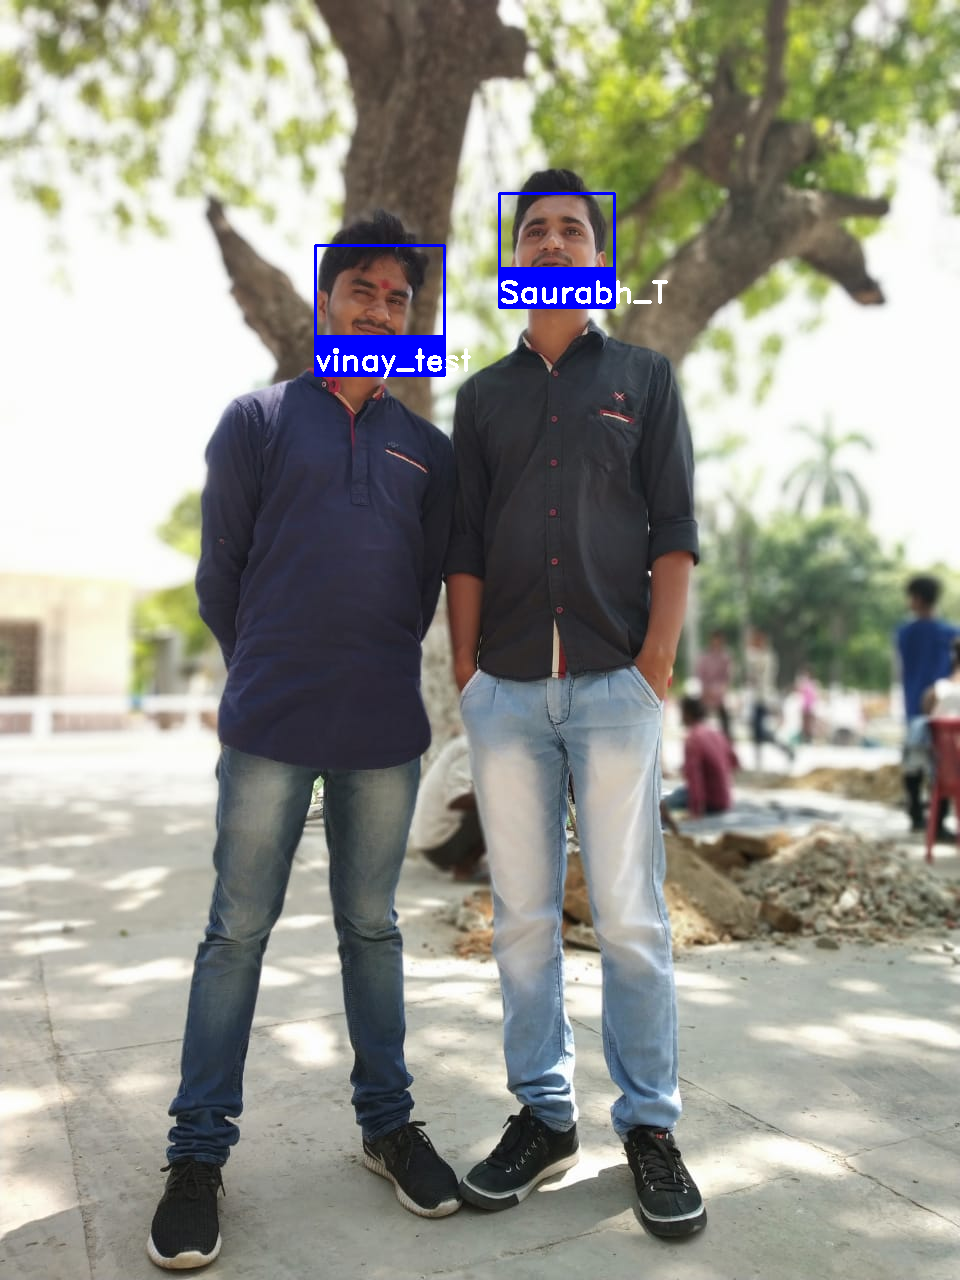

['Saurabh_T', 'vinay_test']


In [11]:
learning("Saurabh_Vinay_Test.jpg")